In [1]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt


img_width, img_height = 224, 224

# Change the path train_data_dir= yourpath/Final_dataset/Train and validation_data_dir= yourpath/Final_dataset/Test
train_data_dir = '/content/drive/MyDrive/Final_dataset/Train'
validation_data_dir = '/content/drive/MyDrive/Final_dataset/Test'
batch_size = 16
nb_train_samples =np.ceil((400*0.8/batch_size)-1)
nb_validation_samples = np.ceil((80*0.8/batch_size)-1)
epochs = 50


if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])


train_datagen = ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

history=model.fit(
	train_generator,
	steps_per_epoch=nb_train_samples ,
	epochs=epochs,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples)




model.save('model_saved.h5')



Found 400 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/50
19/19 [==============================] - 69s 3s/step - loss: 1.0170 - accuracy: 0.4967 - val_loss: 0.9840 - val_accuracy: 0.5000
Epoch 2/50
19/19 [==============================] - 17s 891ms/step - loss: 0.7037 - accuracy: 0.5428 - val_loss: 1.1906 - val_accuracy: 0.5625
Epoch 3/50
19/19 [==============================] - 9s 487ms/step - loss: 0.7026 - accuracy: 0.6020 - val_loss: 0.6732 - val_accuracy: 0.5833
Epoch 4/50
19/19 [==============================] - 7s 369ms/step - loss: 0.6216 - accuracy: 0.6513 - val_loss: 0.8423 - val_accuracy: 0.5208
Epoch 5/50
19/19 [==============================] - 7s 345ms/step - loss: 0.6308 - accuracy: 0.6447 - val_loss: 0.6606 - val_accuracy: 0.6875
Epoch 6/50
19/19 [==============================] - 7s 354ms/step - loss: 0.5846 - accuracy: 0.6974 - val_loss: 0.6221 - val_accuracy: 0.6458
Epoch 7/50
19/19 [==============================] - 7s 357ms/step - 

**Accuracy metrics**

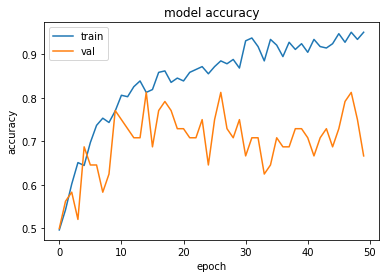

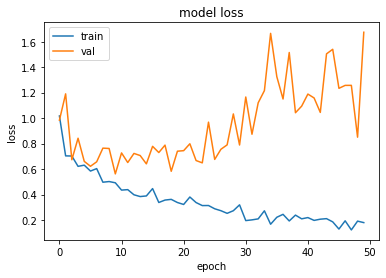

In [2]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**After training and saving model**

1/1 [==============================] - 0s 214ms/step
>>>>  0.00023467566734325374 % FORMAL  <<<<
>>>>  99.99976532433266 % CASUAL  <<<<


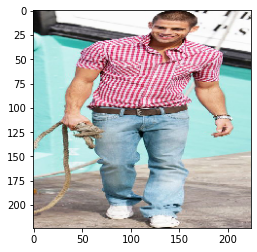

In [7]:
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt


model = load_model('/content/model_saved.h5')

image = load_img('/content/2083bac36ae9ae28d418f5ab060c9e1c.jpg', target_size=(224, 224))
plt.imshow(image)
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

# if(float(label[0][0])<0.5):
#     print('NOT FORMAL')
# else:
#     print('FORMAL')

print( ">>>> ",label[0][0]*100,"% FORMAL"," <<<<")
print( ">>>> ",100-label[0][0]*100,"% CASUAL"," <<<<")